In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Vintage DataFrame

In [161]:
vint_df = pd.read_excel("D:\Credit Risk Model\Vintage Analysis\Vintage_student.xlsx")
vint_df

,Loan Id,Reporting Month,Original EIR,Current EIR,Original UPB,Current UPB,Loan Term,Origination date,Loan Age,Maturity Date,Original LTV,DTI,FICO Origin,Bucket
0,100007365142,2000-07-20,8.00,8.00,75000,74693.00,360,1999-12-19,7,2030-01-20,79,62,763,0
1,100007365142,2000-08-20,8.00,8.00,75000,74587.91,360,1999-12-19,8,2030-01-20,79,62,763,0
2,100007365142,2000-09-20,8.00,8.00,75000,74534.84,360,1999-12-19,9,2030-01-20,79,62,763,0
3,100007365142,2000-10-20,8.00,8.00,75000,74481.42,360,1999-12-19,10,2030-01-20,79,62,763,0
4,100007365142,2000-11-20,8.00,8.00,75000,74427.64,360,1999-12-19,11,2030-01-20,79,62,763,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761398,198992611162,2000-10-20,7.75,7.75,90000,87647.36,180,1999-12-19,10,2015-01-20,41,25,599,0
761399,198992611162,2000-11-20,7.75,7.75,90000,87364.86,180,1999-12-19,11,2015-01-20,41,25,599,0
761400,198992611162,2000-12-20,7.75,7.75,90000,87080.53,180,1999-12-19,12,2015-01-20,41,25,599,0
761401,198992611162,2001-01-20,7.75,7.75,90000,86794.37,180,1999-12-19,13,2015-01-20,41,25,599,0


In [162]:
vint_df.columns

Index(['Loan Id', 'Reporting Month', 'Original EIR', 'Current EIR',
       'Original UPB', 'Current UPB', 'Loan Term', 'Origination date',
       'Loan Age', 'Maturity Date', 'Original LTV', 'DTI', 'FICO Origin',
       'Bucket'],
      dtype='object')

In [163]:
vint_df['Bucket'].value_counts()

Bucket
0     720754
1      24474
2       5334
3       2010
4       1417
       ...  
94         2
95         2
96         2
97         2
98         2
Name: count, Length: 100, dtype: int64

## Delinquency Bucket upto 120 days passed due

In [164]:
vint_df['Delinquency_Bucket'] = np.where(vint_df['Bucket']>3,4,vint_df['Bucket'])
vint_df['Delinquency_Bucket'].value_counts()

Delinquency_Bucket
0    720754
1     24474
4      8831
2      5334
3      2010
Name: count, dtype: int64

## Customer ID vs MOB

In [165]:
vint_df['Loan Id'].unique()

array([100007365142, 100007386460, 100011322040, ..., 198974063165,
       198985370101, 198992611162], dtype=int64)

In [166]:
vint_df['Loan Age'].unique()

array([  7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
        20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,   6,
        58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 18

In [167]:
cust_mob = pd.DataFrame(index = vint_df['Loan Id'].unique(),columns = vint_df['Loan Age'].unique())
cust_mob.index.name = 'Loan ID'
cust_mob

,7,8,9,10,11,12,13,14,15,16,...,267,268,269,270,271,272,273,274,275,276
Loan ID,,,,,,,,,,,,,,,,,,,,,
100007365142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007386460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100011322040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100015192562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100015874399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198971320433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198972751834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198974063165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
cust_mob = vint_df.pivot_table(
    index='Loan Id',                   # Rows
    columns='Loan Age',                # Columns
    values='Delinquency_Bucket',       # Values
    aggfunc='sum',                   # Aggregation function
    fill_value=''                      # Fill NaN with ''
)

In [169]:
cust_mob

Loan Age,6,7,8,9,10,11,12,13,14,15,...,267,268,269,270,271,272,273,274,275,276
Loan Id,,,,,,,,,,,,,,,,,,,,,
100007365142,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,,,,,,,,,,
100007386460,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,,,,,,,,,,
100011322040,,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,,,,,,,,,,
100015192562,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,,,,,,,,,,
100015874399,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198971320433,,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,,,,,,,,,,
198972751834,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,,,,,,,,,,
198974063165,,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,,,,,,,,,,


## DPD Table

In [170]:
dpd = pd.DataFrame(index = vint_df['Loan Id'].unique())

In [183]:
dpd['30_DPD'] = "" 
for indx,sr in cust_mob.iterrows():
    row = sr.values
    match_index = (row==1).argmax() if (row == 1).any() else -1
    if match_index !=-1:
        result = (match_index+1)-1+6 # index starts from 0
    else:
        result = ""
    dpd.at[indx , '30_DPD'] = result

In [184]:
dpd['60_DPD'] = "" 
for indx,sr in cust_mob.iterrows():
    row = sr.values
    match_index = (row==2).argmax() if (row == 2).any() else -1
    if match_index !=-1:
        result = (match_index+1)-1+6
    else:
        result = ""
    dpd.at[indx , '60_DPD'] = result

In [185]:
dpd['90_DPD'] = "" 
for indx,sr in cust_mob.iterrows():
    row = sr.values
    match_index = (row==3).argmax() if (row == 3).any() else -1
    if match_index !=-1:
        result = (match_index+1)-1+6
    else:
        result = ""
    dpd.at[indx , '90_DPD'] = result

In [186]:
dpd

,30_DPD,60_DPD,90_DPD
100007365142,,,
100007386460,,,
100011322040,,,
100015192562,,,
100015874399,,,
...,...,...,...
198971320433,,,
198972751834,,,
198974063165,,,
198985370101,16,42,


## MOB TABLE

In [192]:
mob = pd.DataFrame(index = np.arange(1,4,1),columns=np.arange(3,61,3))
mob

,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
for i in range(3, 61, 3):
    count = (dpd['30_DPD'] == i).sum()  
    
    mob.at[1, i] = count

In [194]:
for i in range(3, 61, 3):
    count = (dpd['60_DPD'] == i).sum()  

    mob.at[2 , i] = count

In [195]:
for i in range(3, 61, 3):
    count = (dpd['90_DPD'] == i).sum()

    mob.at[3 , i] = count

In [196]:
mob

,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60
1,0,6,189,200,148,134,131,96,68,56,39,40,28,32,20,12,10,15,10,6
2,0,2,32,38,26,44,38,35,20,25,20,19,9,12,7,16,13,4,3,3
3,0,2,16,25,26,15,17,24,8,15,16,11,8,13,8,17,5,7,11,3


In [197]:
mob_percentage = (mob.loc[:, :] / len(dpd)) * 100

mob_percentage

,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60
1,0.0,0.024352,0.767077,0.811721,0.600674,0.543853,0.531677,0.389626,0.275985,0.227282,0.158286,0.162344,0.113641,0.129875,0.081172,0.048703,0.040586,0.060879,0.040586,0.024352
2,0.0,0.008117,0.129875,0.154227,0.105524,0.178579,0.154227,0.142051,0.081172,0.101465,0.081172,0.077114,0.036527,0.048703,0.02841,0.064938,0.052762,0.016234,0.012176,0.012176
3,0.0,0.008117,0.064938,0.101465,0.105524,0.060879,0.068996,0.097407,0.032469,0.060879,0.064938,0.044645,0.032469,0.052762,0.032469,0.068996,0.020293,0.02841,0.044645,0.012176


In [198]:
mob_percentage_index = ['30_DPD' , '60_DPD' , '90_DPD']

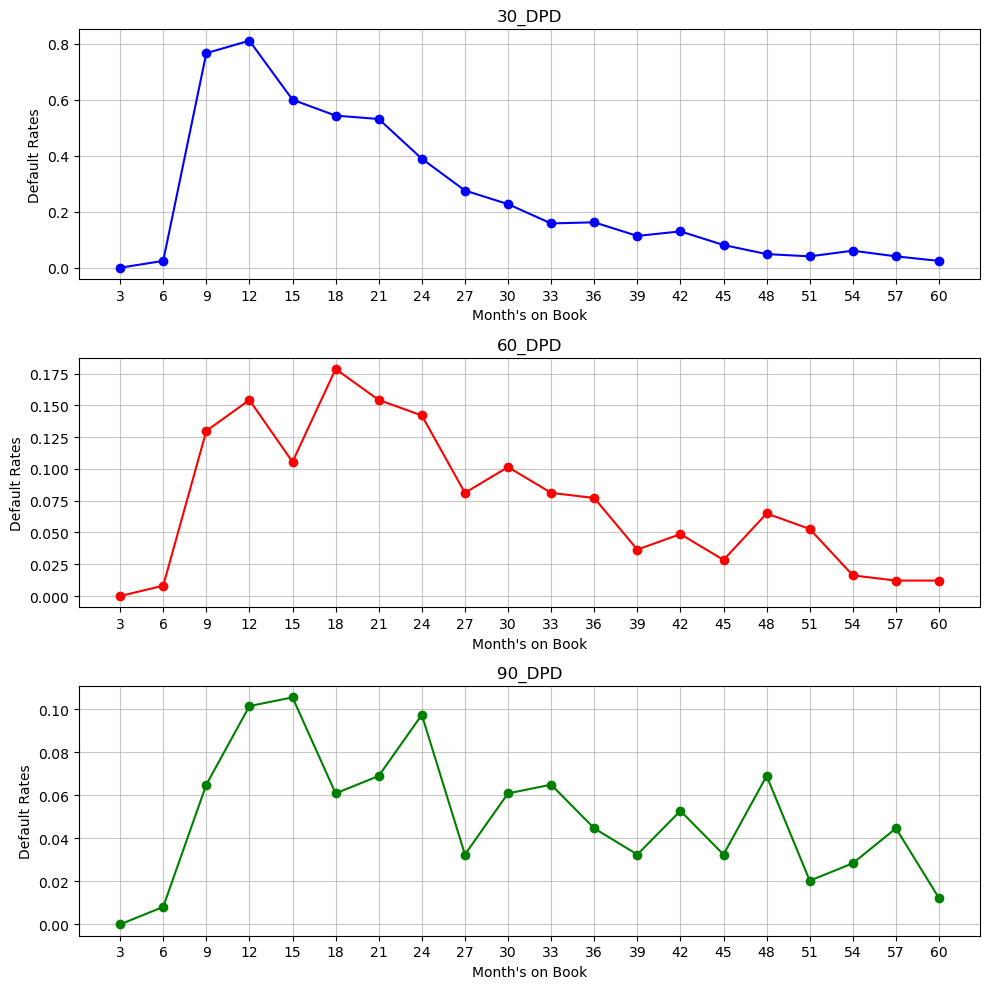

In [204]:
fig , axes = plt.subplots(nrows=3 , ncols = 1 , figsize = (10,10))
axes = axes.flatten()
colors = ['b' , 'r' , 'g']
for i in range(len(mob_percentage)):
    axes[i].plot(mob_percentage.columns, mob_percentage.iloc[i, :] , color=colors[i], marker='o')
    axes[i].set_title(f"{mob_percentage_index[i]}")
    axes[i].set_xticks(mob_percentage.columns)
    axes[i].set_xlabel("Month's on Book")
    axes[i].set_ylabel("Default Rates")
    
    axes[i].grid(True , linestyle='-',alpha = 0.7)
plt.tight_layout()
plt.show()